In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("Top5Complaints.csv")
data.head()

id                                          complaint  \
0  23460  Psychiatric Problem Abnormal Behavior Suicide ...   
1  22783  Psychiatric Problem Abnormal Behavior Suicide ...   
2  22784  Psychiatric Problem Abnormal Behavior Suicide ...   
3  22785  Psychiatric Problem Abnormal Behavior Suicide ...   
4  23456  Psychiatric Problem Abnormal Behavior Suicide ...   

                                        impression         diagnosis  
0                 GI GU Generalized Abdominal Pain  Abdominal Hernia  
1  Behavioral Mental Disorder Not Otherwise Listed    Abdominal Pain  
2  Behavioral Mental Disorder Not Otherwise Listed    Abdominal Pain  
3  Behavioral Mental Disorder Not Otherwise Listed    Abdominal Pain  
4                 GI GU Abdominal Pain Acute Onset    Abdominal Pain

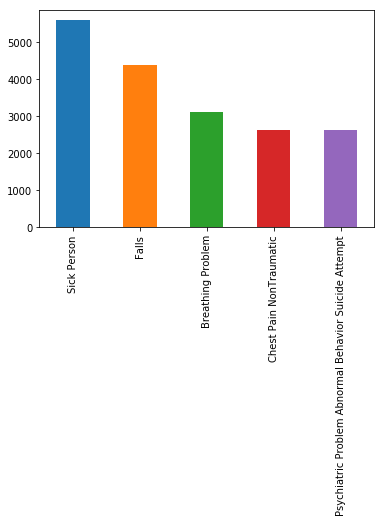

In [2]:
# let's look at it
complaint_counts = data.complaint.value_counts()
complaint_counts.plot.bar()

In [3]:
# get unique names from complaint column
complaint_names = complaint_counts.index
print(complaint_names)

Index(['Sick Person', 'Falls', 'Breathing Problem', 'Chest Pain NonTraumatic',
       'Psychiatric Problem Abnormal Behavior Suicide Attempt'],
      dtype='object')


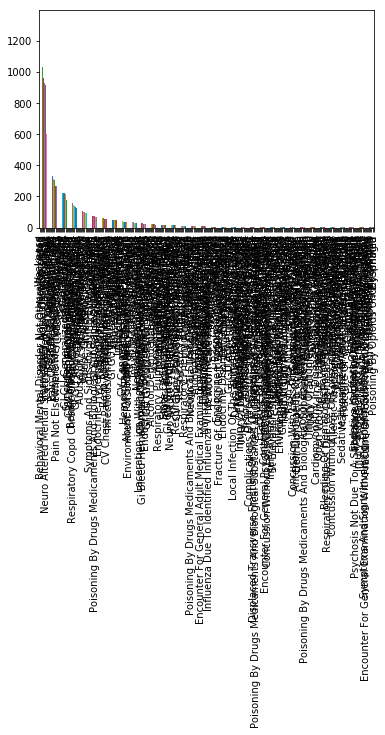

In [4]:
# get top 5 impressions for each of those complaints
top_impressions_subset = data.loc[data['complaint'].isin(complaint_names)]
top_impressions_counts = top_impressions_subset.impression.value_counts()
top_impressions_counts.plot.bar()
# this didn't return what I expected - the data is already filtered to only include the top 5 complaints
# we'll need to subset the data by complaint and then get the top 5 impressions from each subset

In [5]:
# try again - get the top 5 impressions for each of those 5 complaints
complaint_subsets = {}
top_impression_counts = {}
impression_names = {}
for complaint in complaint_names:
    complaint_subsets[complaint] = data.loc[data['complaint'] == complaint]
    top_impression_counts[complaint] = complaint_subsets[complaint].impression.value_counts()[0:5]
    impression_names[complaint] = top_impression_counts[complaint].index
    print("Complaint:", complaint)
    print(impression_names[complaint])
    print(top_impression_counts[complaint])
    print("")

Complaint: Sick Person
Index(['Weakness', 'Neuro Altered Mental Status Altered Loc Decreased Loc',
       'Pain', 'Abdominal Pain', 'Not Recorded'],
      dtype='object')
Weakness                                                 774
Neuro Altered Mental Status Altered Loc Decreased Loc    447
Pain                                                     309
Abdominal Pain                                           297
Not Recorded                                             251
Name: impression, dtype: int64

Complaint: Falls
Index(['Injury Not Otherwise Listed', 'Weakness', 'Not Recorded', 'Pain',
       'Injury Hip'],
      dtype='object')
Injury Not Otherwise Listed    855
Weakness                       344
Not Recorded                   282
Pain                           232
Injury Hip                     216
Name: impression, dtype: int64

Complaint: Breathing Problem
Index(['Respiratory Acute Onset Distress', 'Respiratory Not Otherwise Listed',
       'Not Recorded', 'Weakness', 'Respir

Psychiatric Problem Abnormal Behavior Suicide Attempt


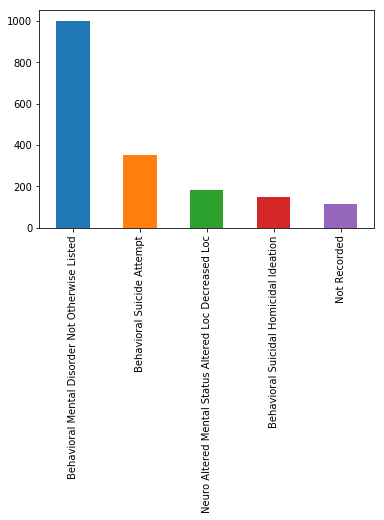

In [6]:
# let's look at it
num = 4
print(complaint_names[num])
top_impression_counts[complaint_names[num]].plot.bar()

In [19]:
# finding top 5 diagnoses for each of the complaint-impression paths we've found so far
impression_subsets = {}
top_diagnosis_counts = {}
diagnosis_names = {}
for complaint in complaint_names:
    impression_subsets[complaint] = {}
    top_diagnosis_counts[complaint] = {}
    diagnosis_names[complaint] = {}
    print("")
    print("Complaint:", complaint)
    for impression in impression_names[complaint]:
        impression_subsets[complaint][impression] = complaint_subsets[complaint].loc[data['impression'] == impression]
        top_diagnosis_counts[complaint][impression] = impression_subsets[complaint][impression].diagnosis.value_counts()[0:5]
        diagnosis_names[complaint][impression] = top_diagnosis_counts[complaint][impression].index
        print("-- Impression:", impression)
        print(diagnosis_names[complaint][impression])
        print(top_diagnosis_counts[complaint][impression])


Complaint: Sick Person
-- Impression: Weakness
Index(['Sepsis', 'Weakness', 'Urinary Tract Infection', 'Acute Kidney Failure',
       'Dizziness And Giddiness'],
      dtype='object')
Sepsis                     114
Weakness                    33
Urinary Tract Infection     32
Acute Kidney Failure        26
Dizziness And Giddiness     24
Name: diagnosis, dtype: int64
-- Impression: Neuro Altered Mental Status Altered Loc Decreased Loc
Index(['Sepsis', 'Altered Mental Status', 'Urinary Tract Infection',
       'Acute Kidney Failure', 'Encephalopathy'],
      dtype='object')
Sepsis                     75
Altered Mental Status      26
Urinary Tract Infection    19
Acute Kidney Failure       14
Encephalopathy             11
Name: diagnosis, dtype: int64
-- Impression: Pain
Index(['Sepsis', 'Cellulitis Of Limb', 'Cutaneous Abscess Of Limb',
       'Urinary Tract Infection', 'Pain In Hip'],
      dtype='object')
Sepsis                       29
Cellulitis Of Limb           17
Cutaneous Absces

-- Impression: Behavioral Suicidal Homicidal Ideation
Index(['Major Depressive Disorder', 'Suicidal Ideations', 'Alcohol Abuse',
       'Alcohol Dependence', 'Anxiety Disorder'],
      dtype='object')
Major Depressive Disorder    53
Suicidal Ideations           25
Alcohol Abuse                 5
Alcohol Dependence            5
Anxiety Disorder              4
Name: diagnosis, dtype: int64
-- Impression: Not Recorded
Index(['Major Depressive Disorder', 'Laceration ', 'Suicidal Ideations',
       'Alcohol Abuse', 'Bipolar Disorder'],
      dtype='object')
Major Depressive Disorder    17
Laceration                    7
Suicidal Ideations            6
Alcohol Abuse                 6
Bipolar Disorder              5
Name: diagnosis, dtype: int64


In [30]:
# making a dataframe - turned out to not be what we needed
top5_data = pd.DataFrame({"id":[], "complaint":[], "impression":[], "diagnosis":[]})
count = 0
for complaint in complaint_names:
    for impression in impression_names[complaint]:
        for diagnosis in diagnosis_names[complaint][impression]:
            top5_temp = impression_subsets[complaint][impression].loc[data["diagnosis"] == diagnosis]
            top5_data = top5_data.append(top5_temp)
            count += 1
            
len(top5_data.complaint.unique())

5

In [42]:
# formatting the top 5 data + counts as a list
top5_list = []
for complaint, impression_dict in top_diagnosis_counts.items():
    for impression, diagnosis_list in impression_dict.items():
        for diagnosis in diagnosis_list.iteritems():
            top5_list.append([complaint, impression, diagnosis[0], diagnosis[1]])
len(top5_list)

125

In [45]:
# code from stackoverflow
# outputting the list contents as a csv
import csv
with open("listoutput.csv", 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(top5_list)
# I'll need to find & replace some of the extra punctuation